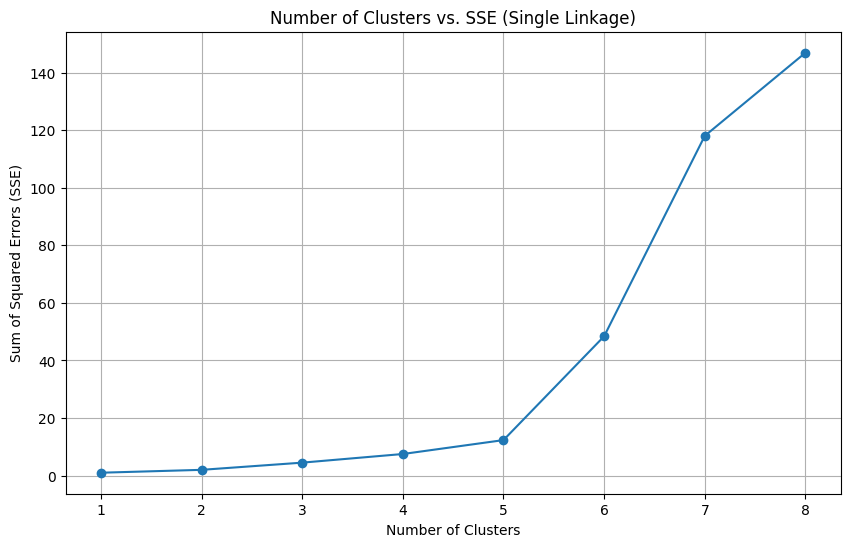

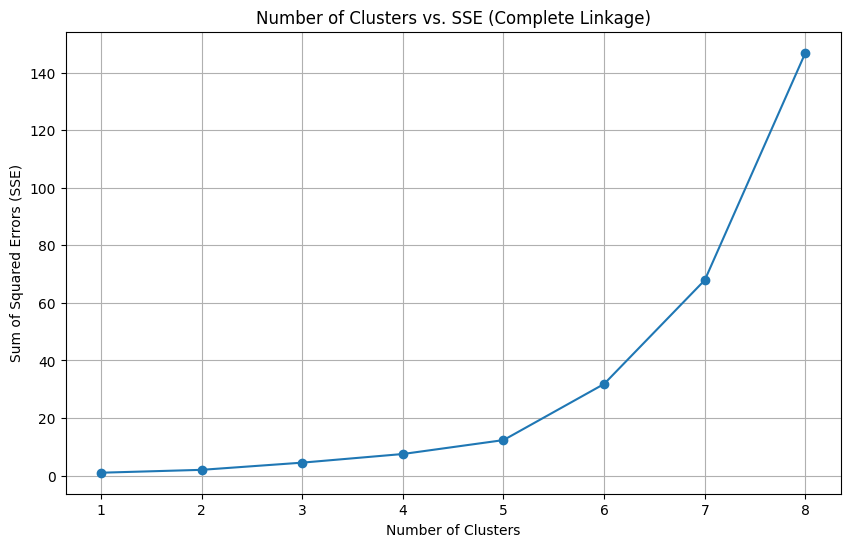

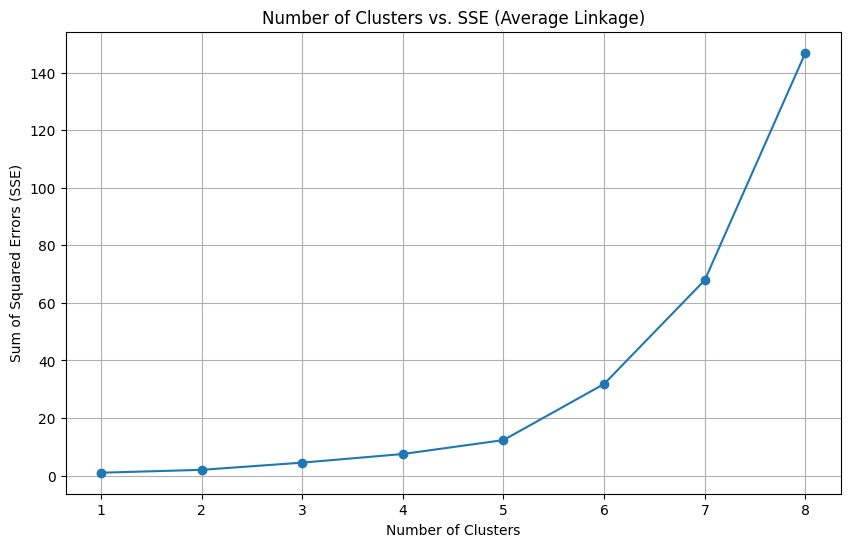

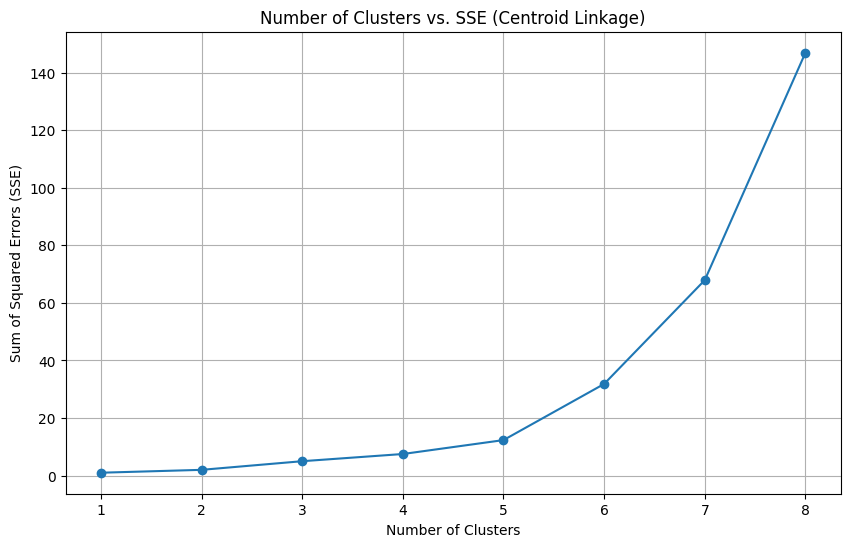

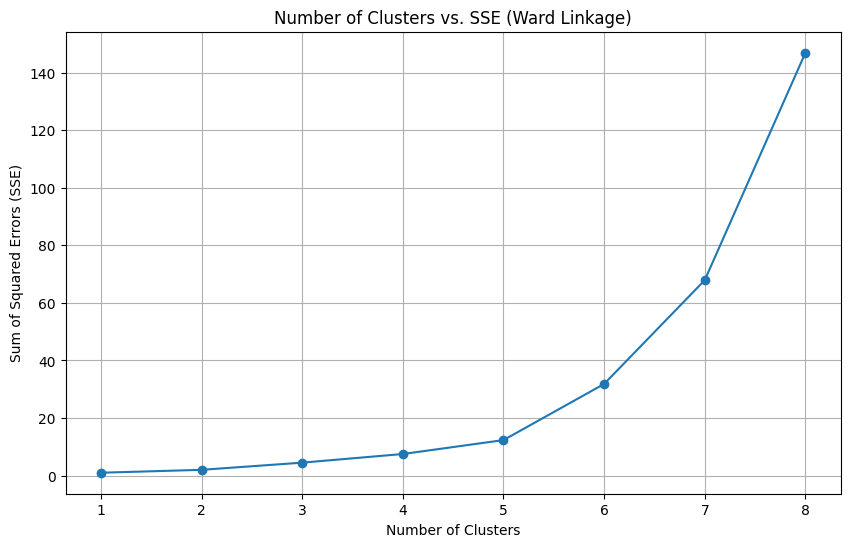

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('files/points.csv')
data = np.array(data)

# Given data points
# data = np.array([
#     [1, 1],
#     [3, 2],
#     [9, 1],
#     [3, 7],
#     [7, 2],
#     [9, 7],
#     [4,8],
#     [8, 3],
#     [1, 4]
# ])



# Function to calculate Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to calculate Sum of Squared Errors (SSE) for given clusters and centroids
def calculate_sse(data, clusters, centroids):
    sse = 0
    for i, cluster in enumerate(clusters):
        for point_index in cluster:
            sse += euclidean_distance(data[point_index], centroids[i]) ** 2
    return sse

# Function to perform hierarchical clustering and calculate SSE
def hierarchical_clustering_with_sse(data, linkage_method):
    clusters = [[i] for i in range(len(data))]
    sse_values = []

    # Function to calculate linkage distance between clusters
    def linkage_distance(cluster1, cluster2, method):
        if method == "single":
            return min(euclidean_distance(data[i], data[j]) for i in cluster1 for j in cluster2)
        elif method == "complete":
            return max(euclidean_distance(data[i], data[j]) for i in cluster1 for j in cluster2)
        elif method == "average":
            return np.mean([euclidean_distance(data[i], data[j]) for i in cluster1 for j in cluster2])
        elif method == "centroid":
            centroid1 = np.mean([data[i] for i in cluster1], axis=0)
            centroid2 = np.mean([data[j] for j in cluster2], axis=0)
            return euclidean_distance(centroid1, centroid2)
        elif method == "ward":
            # Ward's method: Calculate the increase in SSE if the clusters are merged
            centroid1 = np.mean([data[i] for i in cluster1], axis=0)
            centroid2 = np.mean([data[j] for j in cluster2], axis=0)
            combined_centroid = np.mean([data[i] for i in cluster1 + cluster2], axis=0)
            sse_before = sum(euclidean_distance(data[i], centroid1) ** 2 for i in cluster1) + \
                         sum(euclidean_distance(data[j], centroid2) ** 2 for j in cluster2)
            sse_after = sum(euclidean_distance(data[i], combined_centroid) ** 2 for i in cluster1 + cluster2)
            return sse_after - sse_before

    # Agglomerative hierarchical clustering
    while len(clusters) > 1:
        min_distance = float("inf")
        to_merge = (0, 0)

        # Find the two clusters with the smallest distance
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = linkage_distance(clusters[i], clusters[j], linkage_method)
                if distance < min_distance:
                    min_distance = distance
                    to_merge = (i, j)

        # Merge the two closest clusters
        clusters[to_merge[0]].extend(clusters[to_merge[1]])
        del clusters[to_merge[1]]

        # Calculate the new centroids for the remaining clusters
        centroids = [np.mean([data[idx] for idx in cluster], axis=0) for cluster in clusters]

        # Calculate SSE for the current clustering
        sse = calculate_sse(data, clusters, centroids)
        sse_values.append(sse)

    return sse_values

# Perform hierarchical clustering and plot SSE for each linkage method
linkage_methods = ["single", "complete", "average", "centroid", "ward"]
for method in linkage_methods:
    sse_values = hierarchical_clustering_with_sse(data, method)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(sse_values) + 1), sse_values, marker='o')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title(f"Number of Clusters vs. SSE ({method.capitalize()} Linkage)")
    plt.grid(True)
    plt.show()